In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import API key
from config import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [72]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [73]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_units = "imperial"
#Import API key
# from config import weather_api_key
weather_api_key="dfc2727692557b5a27a7378f50f6abae"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={query_units}&q="

In [89]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={query_units}&q="

lat = []
lon = []
max_temp = []
country = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
time_zone = []
date_and_time = []
found_cities=[]

for i, city in enumerate(cities):
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        country.append(response["sys"]["country"])
        time_zone.append(response["timezone"])
        date_and_time.append(response["dt"])
        found_cities.append(city)
        print(f"Processing Record {i+1}: {city} found: appending data")
    except Exception:
        print(f"Processing Record {i+1}: {city} not found: skipping...")
else:
    print("Data Retrieval Complete")



Processing Record 1: narsaq found: appending data
Processing Record 2: hilo found: appending data
Processing Record 3: tsihombe not found: skipping...
Processing Record 4: barrow found: appending data
Processing Record 5: cape town found: appending data
Processing Record 6: san vicente found: appending data
Processing Record 7: mount gambier found: appending data
Processing Record 8: beruwala found: appending data
Processing Record 9: lebu found: appending data
Processing Record 10: filingue found: appending data
Processing Record 11: butaritari found: appending data
Processing Record 12: clyde river found: appending data
Processing Record 13: rocha found: appending data
Processing Record 14: tuktoyaktuk found: appending data
Processing Record 15: avarua found: appending data
Processing Record 16: tasiilaq found: appending data
Processing Record 17: dingle found: appending data
Processing Record 18: rikitea found: appending data
Processing Record 19: sungaipenuh found: appending data
P

In [90]:
print(len(found_cities),len(lat),len(temp),len(humidity),len(cloudiness),len(wind_speed))

590 590 590 590 590 590


In [112]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": found_cities,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Maximum Speed": max_temp,
    "Country": country,
    "Time Zone": time_zone,
    "Date and Time": date_and_time
}
weather_data = pd.DataFrame(weather_dict)
weather_data
import os
weather_data.to_csv(os.path.join("output_data_file.csv"))

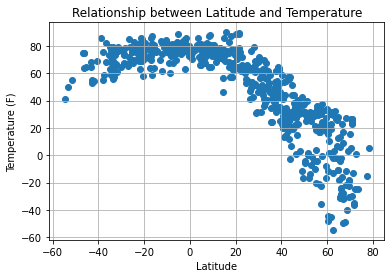

In [113]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Relationship between Latitude and Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

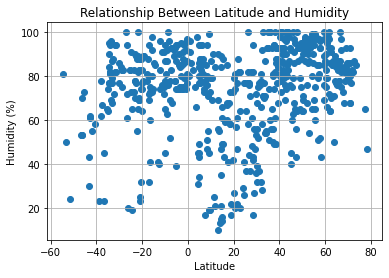

In [114]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Relationship Between Latitude and Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

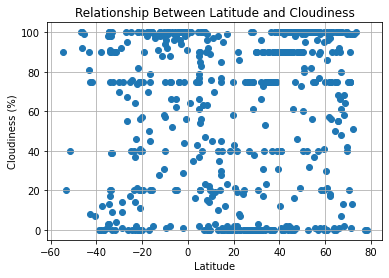

In [115]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Relationship Between Latitude and Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

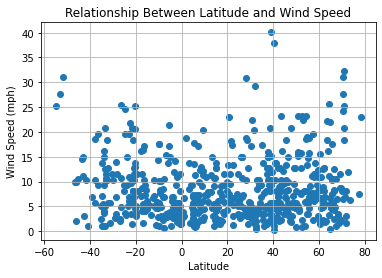

In [116]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Relationship Between Latitude and Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()